In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Loan approval prediction (1).csv")

In [3]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df.tail()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


In [5]:
df.drop("id",axis = 1,inplace=True)

In [6]:
le = LabelEncoder()
col  = [["cb_person_default_on_file","loan_intent","person_home_ownership"]]
for col in df:
    df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,17,381,3,0,1,1,164,119,17,0,12,0
1,2,1129,2,6,3,2,97,178,7,0,0,0
2,9,191,2,8,4,0,164,49,21,0,8,0
3,10,1599,3,14,5,1,331,108,17,0,3,0
4,2,1285,3,2,3,0,164,14,10,0,1,0


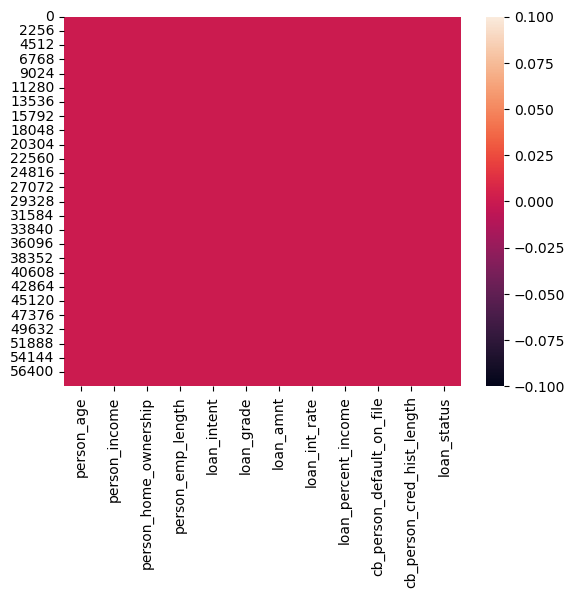

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.duplicated().sum()

0

In [10]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Sajjad\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
pred = model.predict(x_test)

In [19]:
print("accuracy_score is: ",accuracy_score(pred,y_test))

accuracy_score is:  0.8876289538750106


In [21]:
print("classification_report is: ",classification_report(pred,y_test))

classification_report is:                precision    recall  f1-score   support

           0       0.97      0.91      0.94     10779
           1       0.39      0.67      0.49       950

    accuracy                           0.89     11729
   macro avg       0.68      0.79      0.71     11729
weighted avg       0.92      0.89      0.90     11729



In [23]:
cm = confusion_matrix(pred,y_test)

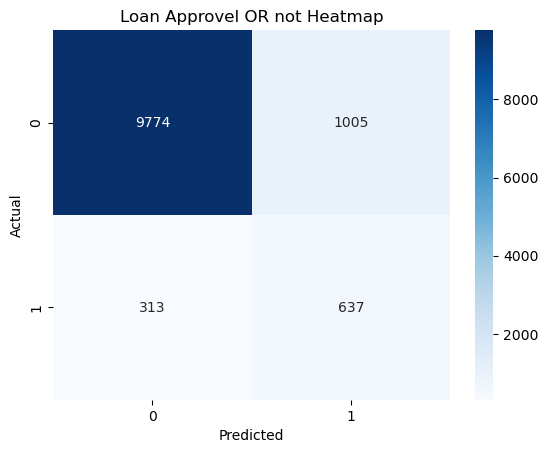

In [25]:
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")
plt.title("Loan Approvel OR not Heatmap")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
import joblib

# Save model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [ ]:
df['loan_status'].value_counts()
